# Análise de voos cancelados

## Importando Bibliotecas

In [1]:
# Ignorar avisos 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

## Carragando o Banco de Dados

In [12]:
df = pd.read_csv('DelayedFlights.zip')

In [13]:
df['Year'].unique() # só ha valores de 2008

array([2008], dtype=int64)

In [14]:
# Excluindo a primeira coluna
df = df.drop(df.columns[:1], axis=1)

In [15]:
# Total de Registros
Total_Registros = len(df)

In [16]:
voos_cancelados = df[df['Cancelled']==1]

In [17]:
# Total de Cancelamentos
Total_Cancelados = len(voos_cancelados)

In [18]:
print(f'A Porcentagem de voos cancelados em 2008: {round(100*Total_Cancelados/Total_Registros,4)}%')

A Porcentagem de voos cancelados em 2008: 0.0327%


In [19]:
# Excluindo colunas que não serão utilizadas na análise dos voos cancelados

voos_cancelados.drop(['Year','TaxiIn', 'TaxiOut', 'TailNum', 
                      'FlightNum', 'UniqueCarrier','Cancelled',
                      'DepTime', 'CRSDepTime','ArrTime','CRSArrTime', # horários
                      'ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay',
                      'DepDelay','Distance','CarrierDelay','WeatherDelay',
                      'NASDelay','SecurityDelay','LateAircraftDelay','Diverted'],
                       axis=1, inplace=True)

In [20]:
voos_cancelados.nunique()

Month                 3
DayofMonth           31
DayOfWeek             7
Origin              116
Dest                164
CancellationCode      3
dtype: int64

Verificar a quantidade de linhas com valores nulos

In [21]:
voos_cancelados.isnull().sum().sort_values(ascending=False) # não há valores nulos

Month               0
DayofMonth          0
DayOfWeek           0
Origin              0
Dest                0
CancellationCode    0
dtype: int64

In [22]:
lista_var_discretas = ['Month','DayofMonth','DayOfWeek']

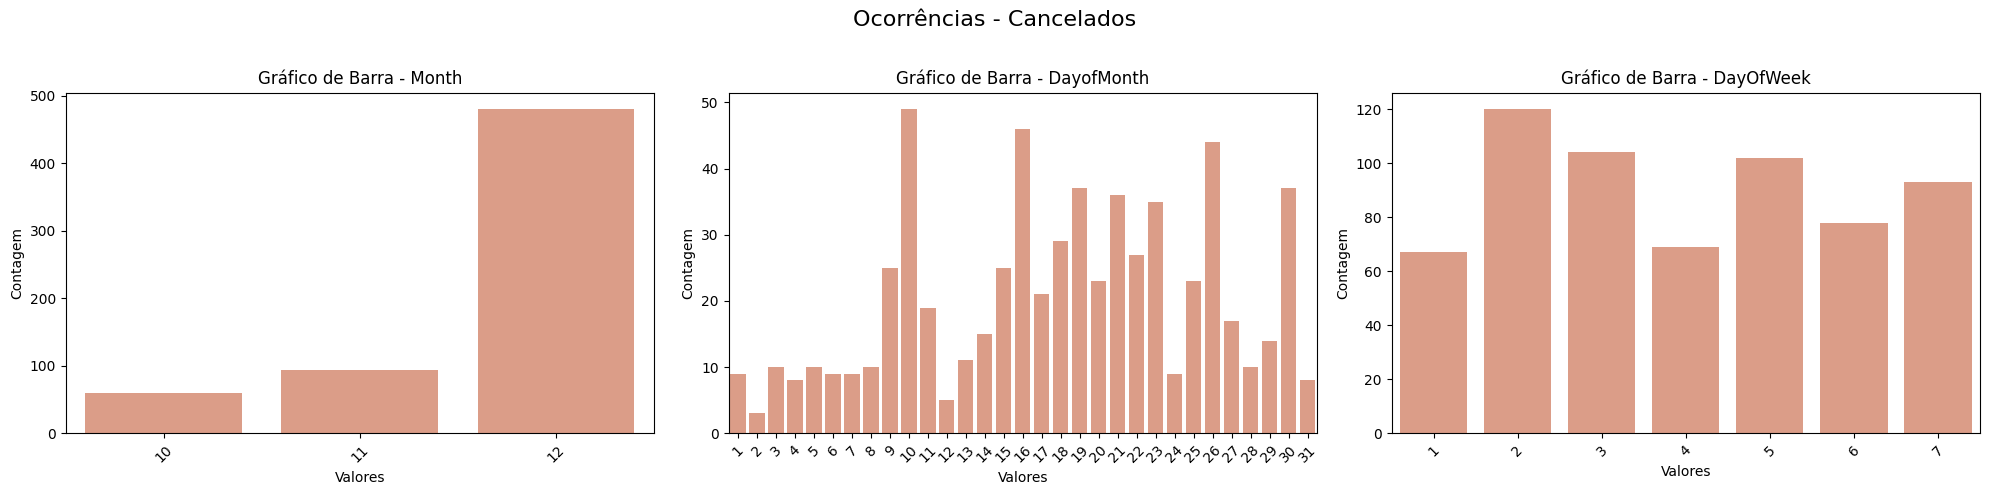

In [24]:
# Criar gráficos de barra para variáveis discretas
fig, axs =plt.subplots(1,3, figsize = (20,5))

for i, ax in zip(lista_var_discretas, axs.flatten()):
    sns.countplot(x=i, data=voos_cancelados[[i]], ax=ax, color='DarkSalmon')
    ax.set_title(f'Gráfico de Barra - {i}')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Contagem')
    # Ajusta a rotação dos rótulos para melhor legibilidade
    ax.tick_params(axis='x', rotation=45)

# Adiciona um título geral acima dos subgráficos
fig.suptitle('Ocorrências - Cancelados', fontsize=16)

# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Exibe a figura
plt.show()

In [25]:
print(voos_cancelados['Month'].value_counts())

Month
12    480
11     94
10     59
Name: count, dtype: int64


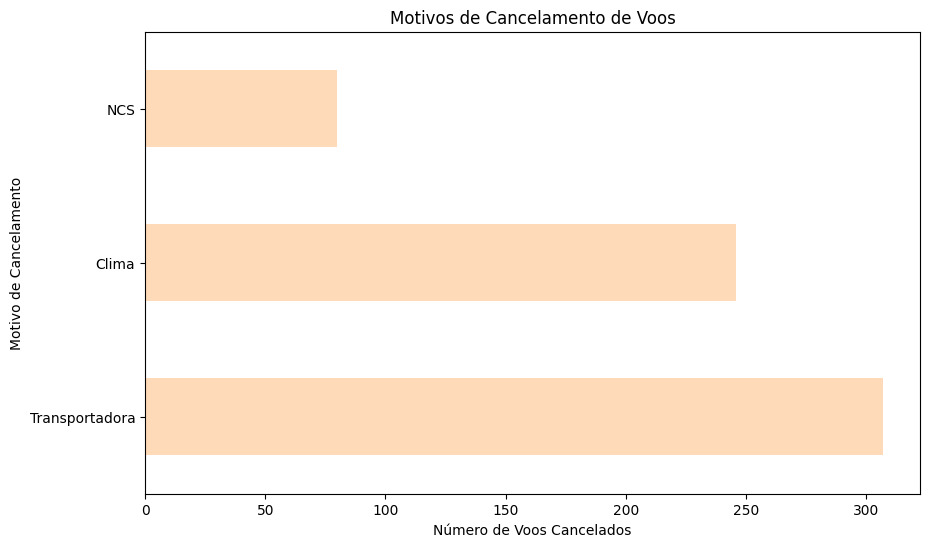

In [28]:
# gráfico para analisar qual o maior motivo para cancelamento de voo
#voos_cancelados = df[df['Cancelled']==1]
legend_labels = {'A': 'Transportadora', 'B': 'Clima', 'C': 'NCS'}

# Criar gráfico de barras horizontais
plt.figure(figsize=(10, 6))
ax = voos_cancelados['CancellationCode'].value_counts().plot(kind='barh', color='PeachPuff')

# Adicionar etiquetas e título
ax.set_yticklabels([legend_labels[label] for label in voos_cancelados['CancellationCode'].unique()])
plt.xlabel('Número de Voos Cancelados')
plt.ylabel('Motivo de Cancelamento')
plt.title('Motivos de Cancelamento de Voos')

plt.show()

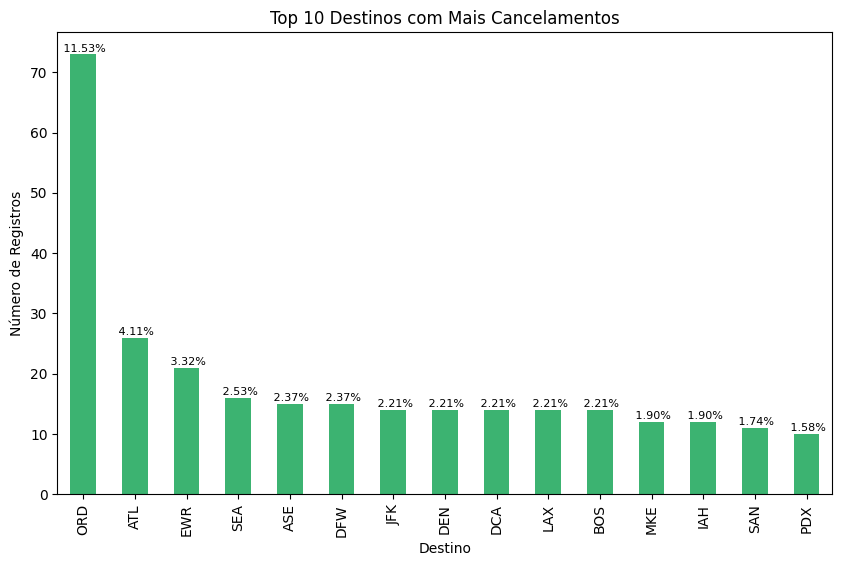

In [29]:
# Configurações do gráfico
plt.figure(figsize=(10, 6))
top_destinos = voos_cancelados['Dest'].value_counts().nlargest(15)

# Criando o gráfico de barras
top_destinos.plot(kind='bar', color='MediumSeaGreen')

# Adicionando rótulos e título
plt.title('Top 10 Destinos com Mais Cancelamentos')
plt.xlabel('Destino')
plt.ylabel('Número de Registros')

porcentagens = (top_destinos / Total_Cancelados) * 100
# Adicionando anotações com os valores e porcentagens
for i, (v, p) in enumerate(zip(top_destinos, porcentagens)):
    plt.text(i, v + 0.1, f' {p:.2f}%', ha='center', va='bottom', fontsize=8)

# Exibindo o gráfico
plt.show()

In [30]:
Cancelados_dds = voos_cancelados['DayOfWeek'].value_counts(normalize=True)*100
print(Cancelados_dds)

DayOfWeek
2    18.957346
3    16.429700
5    16.113744
7    14.691943
6    12.322275
4    10.900474
1    10.584518
Name: proportion, dtype: float64


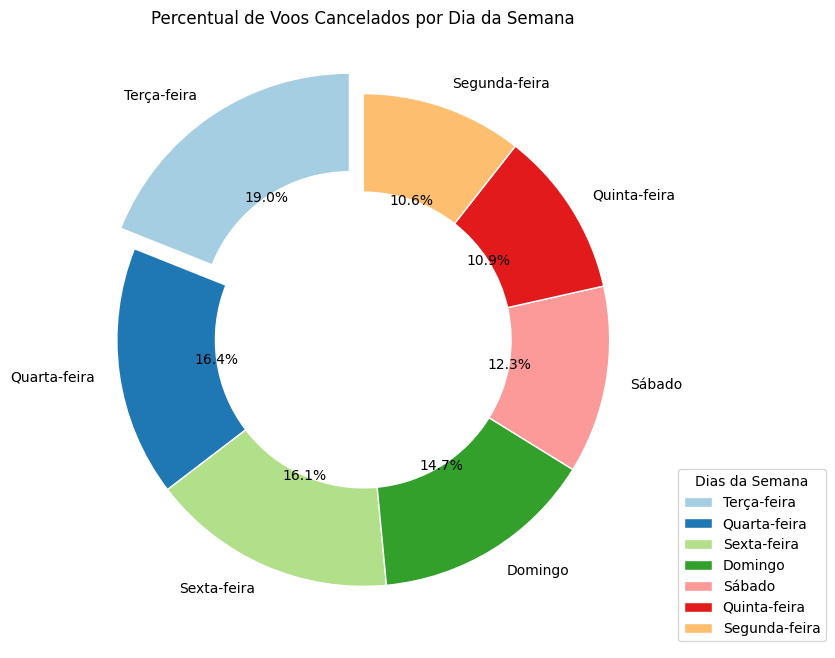

In [31]:
contagens_normalizadas = voos_cancelados['DayOfWeek'].value_counts(normalize=True) * 100

# Colocando na ordem apresentada no value_counts
dias_da_semana = ['Terça-feira', 'Quarta-feira', 'Sexta-feira', 'Domingo', 'Sábado', 'Quinta-feira', 'Segunda-feira']

# Criando o gráfico de pizza com algumas melhorias
plt.figure(figsize=(10, 8))
explode = (0.1, 0, 0, 0, 0, 0, 0)  # Destaca a primeira fatia
colors = plt.cm.Paired.colors

# Adicionando sombra e bordas às fatias
wedges, texts, autotexts = plt.pie(contagens_normalizadas, labels=dias_da_semana, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, wedgeprops=dict(width=0.4, edgecolor='w'))

# Adicionando uma legenda personalizada
plt.legend(wedges, dias_da_semana, title='Dias da Semana', loc='lower left', bbox_to_anchor=(1, 0, 0.5, 1))

# Adicionando título
plt.title('Percentual de Voos Cancelados por Dia da Semana')

# Exibindo o gráfico
plt.show()